In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as font_manager

# definindo alguns padrões de fontes
front_prop_small = font_manager.FontProperties(size=14)
font_prop = font_manager.FontProperties(size=16)
font_prop_big = font_manager.FontProperties(size=18)

%matplotlib inline

# ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kaggle as kg
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [3]:
api.dataset_list_files('sudalairajkumar/novel-corona-virus-2019-dataset').files

[time_series_covid_19_confirmed_US.csv,
 time_series_covid_19_recovered.csv,
 time_series_covid_19_deaths_US.csv,
 time_series_covid_19_confirmed.csv,
 COVID19_line_list_data.csv,
 covid_19_data.csv,
 time_series_covid_19_deaths.csv,
 COVID19_open_line_list.csv]

In [4]:
api.dataset_download_files(
    dataset='sudalairajkumar/novel-corona-virus-2019-dataset',
    path='gt.zip',
    unzip=True)

covid = pd.read_csv('gt.zip/covid_19_data.csv',
                    encoding='ISO-8859-1',
                    parse_dates=['ObservationDate'])

In [5]:
covid.tail()

SNo ObservationDate Province/State  Country/Region  \
20569  20570      2020-05-01        Wyoming              US   
20570  20571      2020-05-01       Xinjiang  Mainland China   
20571  20572      2020-05-01          Yukon          Canada   
20572  20573      2020-05-01         Yunnan  Mainland China   
20573  20574      2020-05-01       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
20569  2020-05-02 02:32:27      566.0     7.0        0.0  
20570  2020-05-02 02:32:27       76.0     3.0       73.0  
20571  2020-05-02 02:32:27       11.0     0.0        0.0  
20572  2020-05-02 02:32:27      185.0     2.0      181.0  
20573  2020-05-02 02:32:27     1268.0     1.0     1265.0

In [6]:
# dados para 220 regiões
len(np.unique(covid['Country/Region']))

222

In [7]:
# estilos para os gráficos
sns.set_style('white')
sns.set_context('talk')

In [8]:
import datetime as dt
import matplotlib.dates as mdates

# para convesão das datas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# colors
azul = '#1f78b4'
vermelho = '#ff2121'
branco = 'white'

# outros parâmetros usados adiante
fontweight='bold'
textcoords='offset points'

# dados usados no gráfico
brasil = covid[covid['Country/Region'] == 'Brazil'].query('Confirmed > 0')  # 
casos_ultimas_24h = brasil['Confirmed'].iloc[-1] - brasil['Confirmed'].iloc[-2]
mortes_ultimas_24h = brasil['Deaths'].iloc[-1] - brasil['Deaths'].iloc[-2]
data_inicial = brasil['ObservationDate'].iloc[0]
data_final = brasil['ObservationDate'].iloc[-1]
mortes_acumuladas = brasil['Deaths'].iloc[-1]
casos_acumulados = brasil['Confirmed'].iloc[-1]

# data do meio do dataset para inserir anotação no meio do gráfico
data_meio = int(len(brasil)/2)
data_meio = brasil['ObservationDate'].iloc[data_meio]

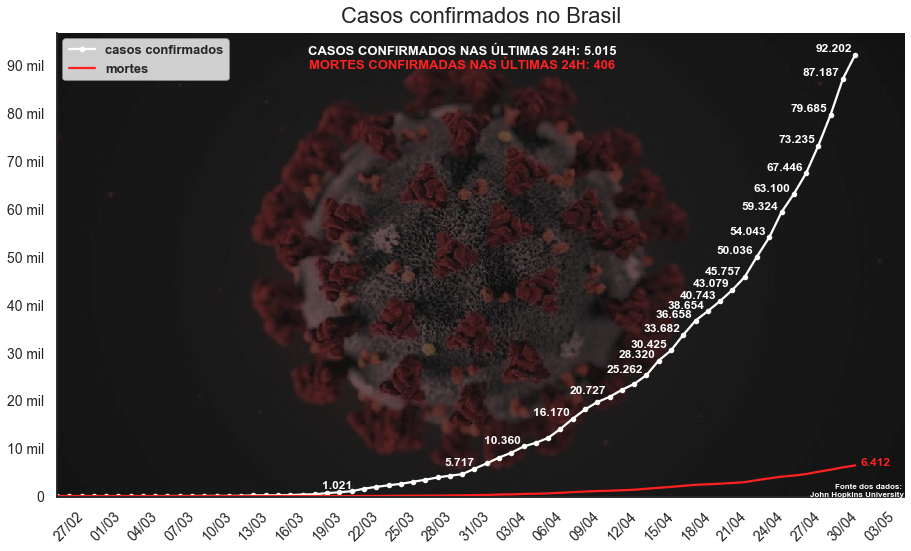

In [9]:
fig,ax = plt.subplots(figsize = (13,8))

# dados para plotar
x = brasil['ObservationDate']
y = brasil['Confirmed']
plt.plot(x, y, marker='.', label='casos confirmados', color=branco)
plt.plot(x, brasil['Deaths'], label='mortes', color=vermelho)

# anotando os valores acima de 25k
for i, j in zip(x,y):
    if j > 2.5e+4:
        ax.annotate(str('{:,.0f}').format(j).replace(',', '.'), xy=(i,j),
                    color=branco, size=12, fontweight=fontweight,
                    xytext=(-40, 3), textcoords='offset points')

# anotando outros valores (manualmente porque são alguns valores escolhidos)
ax.annotate('1.021',('2020-03-21',1021), xytext=(-30,3), color=branco, textcoords=textcoords, size=12, fontweight=fontweight)
ax.annotate('5.717',('2020-03-31',5717), xytext=(-30,3), color=branco, textcoords=textcoords, size=12, fontweight=fontweight)
ax.annotate('10.360',('2020-04-04',10360), xytext=(-40,3), color=branco, textcoords=textcoords, size=12, fontweight=fontweight)
ax.annotate('16.170',('2020-04-08',16170), xytext=(-40,3), color=branco, textcoords=textcoords, size=12, fontweight=fontweight)
ax.annotate('20.727',('2020-04-11',20727), xytext=(-40,3), color=branco, textcoords=textcoords, size=12, fontweight=fontweight)

# configurações para adicionar a imagem de fundo
x_lims = [data_inicial, data_final + dt.timedelta(days=4)]                 # datas para limites da esquerda e da direita
x_lims = mdates.date2num(x_lims)                                           # transformando as datas em números
y_lims = [-100, casos_acumulados+casos_acumulados*.05]                     # limites inferior e superior
extent = [x_lims[0], x_lims[1],  y_lims[0], y_lims[1]]                     # left, right, bottom, top

img = plt.imread('covid.jpg')                                              # carregando a imagem                         
ax.imshow(img, extent=extent, aspect='auto')                               # parâmetros para ajuste da imagem

# anotando o número acumulado de mortes ao final da curva vermelha
ax.annotate(str('{:,.0f}').format(mortes_acumuladas).replace(',','.'),
            (data_final, mortes_acumuladas), xytext=(5, 0), color=vermelho,
            textcoords='offset points', size=12, fontweight=fontweight)

# anotando o número de mortes confirmadas nas últimas 24h
ax.annotate(str('MORTES CONFIRMADAS NAS ÚLTIMAS 24H: ') +                  # texto
            str(('{:,.0f}').format(mortes_ultimas_24h).replace(',','.')),  # mortes nas últimas 24h
            (data_meio, casos_acumulados-casos_acumulados*.03),            # localização da anotação
            color=vermelho, size=13, fontweight=fontweight, ha='center')   # estilos da fonte

# anotando o número de casos confirmados nas últimas 24h
ax.annotate(str('CASOS CONFIRMADOS NAS ÚLTIMAS 24H: ') +                   # texto
            str(('{:,.0f}').format(casos_ultimas_24h).replace(',','.')),   # casos confirmados nas últimas 24h
            (data_meio, casos_acumulados),                                 # localização da anotação 
            color=branco, size=13, fontweight=fontweight, ha='center')     # estilos da fonte

# anotando a fonte dos dados
ax.annotate('Fonte dos dados: \nJohn Hopkins University',                  # texto
            (data_final + dt.timedelta(days=4), 0),                        # localização da anotação 
            color=branco , size=8, fontweight=fontweight, ha='right')      # estilos da fonte

# tamanho da fonte dos valores nos eixos x e y
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(front_prop_small)

# formatando as datas e definindo o intervalo
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))

# outras formatações
plt.title('Casos confirmados no Brasil', size=22, pad=10)                  # título
ax.legend(loc='upper left', prop={'weight':'bold', 'size':13})             # configurações da legenda
plt.yticks([0, 1e+4, 2e+4, 3e+4, 4e+4, 5e+4, 6e+4, 7e+4, 8e+4, 9e+4],      # valores do eixo y
           ['0', '10 mil', '20 mil', '30 mil', '40 mil', '50 mil',
            '60 mil', '70 mil', '80 mil', '90 mil'])
plt.xticks(rotation=45)                                                    # rotação do valores do eixo x
ax.set_ylim(-100,)                                                         # limite inferior do eixo y
sns.despine()                                                              # retira linhas superior e direita
plt.tight_layout()                                                         # para não haver cortes na hora de salvar

plt.savefig('1_casos_no_brasil.png', dpi=400);

In [10]:
coordenadas = {'AC': [-8.77, -70.55],
               'AL': [-9.62, -36.82],
               'AM': [-3.47, -65.10],
               'AP': [1.41, -51.77],
               'BA': [-13.29, -41.71],
               'CE': [-5.20, -39.53],
               'DF': [-15.83, -47.86],
               'ES': [-19.19, -40.34],
               'GO': [-15.98, -49.86],
               'MA': [-5.42, -45.44],
               'MT': [-12.64, -55.42],
               'MS': [-20.51, -54.54],
               'MG': [-18.10, -44.38],
               'PA': [-3.79, -52.48],
               'PB': [-7.28, -36.72],
               'PR': [-24.89, -51.55],
               'PE': [-8.38, -37.86],
               'PI': [-6.60, -42.28],
               'RJ': [-22.25, -42.66],
               'RN': [-5.81, -36.59],
               'RO': [-10.83, -63.34],
               'RS': [-30.17, -53.50],
               'RR': [1.99, -61.33],
               'SC': [-27.45, -50.95],
               'SE': [-10.57, -37.45],
               'SP': [-22.19, -48.79],
               'TO': [-9.46, -48.26]}

coordenadas = pd.DataFrame(coordenadas).T
coordenadas = coordenadas.reset_index()
coordenadas.columns = ['estado','latitude','longitude']

In [11]:
coordenadas.head()

estado  latitude  longitude
0     AC     -8.77     -70.55
1     AL     -9.62     -36.82
2     AM     -3.47     -65.10
3     AP      1.41     -51.77
4     BA    -13.29     -41.71

In [12]:
import json
import requests

In [13]:
r = requests.get('https://painel-covid.herokuapp.com/api')
covid_estados_brasileiros = r.json()

In [14]:
df = pd.DataFrame(covid_estados_brasileiros)
df = df.dropna()

In [15]:
df['casosNovos'] = df['casosNovos'].astype(int)
df['casosAcumulados'] = df['casosAcumulados'].astype(int)
df['obitosNovos'] = df['obitosNovos'].astype(int)
df['obitosAcumulados'] = df['obitosAcumulados'].astype(int)
df['data'] = pd.to_datetime(df['data'], format='%Y/%m/%d')

In [16]:
df = df[['regiao', 'estado', 'data', 'casosAcumulados', 'obitosAcumulados']]
df.columns = ['regiao', 'estado', 'data', 'confirmados', 'óbitos']

In [17]:
df.head()

regiao estado       data  confirmados  óbitos
0  Norte     RO 2020-01-30            0       0
1  Norte     RO 2020-01-31            0       0
2  Norte     RO 2020-02-01            0       0
3  Norte     RO 2020-02-02            0       0
4  Norte     RO 2020-02-03            0       0

In [18]:
df_agrupado = df.groupby(['estado', 'data'])['confirmados', 'óbitos'].sum().reset_index()

# ordenando o dataframe por mais casos confirmados
df_agrupado.sort_values(by='confirmados', ascending=False)

estado       data  confirmados  óbitos
2417     SP 2020-05-01        30374    2511
2416     SP 2020-04-30        28698    2375
2415     SP 2020-04-29        26158    2247
2414     SP 2020-04-28        24041    2049
2413     SP 2020-04-27        21696    1825
...     ...        ...          ...     ...
1142     MT 2020-02-25            0       0
1141     MT 2020-02-24            0       0
1140     MT 2020-02-23            0       0
1139     MT 2020-02-22            0       0
1255     PA 2020-03-16            0       0

[2511 rows x 4 columns]

In [19]:
# Agrupa quantidade de casos por data
temp = df.groupby(['data'])['confirmados', 'óbitos'].sum().reset_index()

In [20]:
# Remodela o dataframe com variável e valor para ter quantidades de recuperados, mortos e ativos
temp = temp.melt(id_vars=['data'], value_vars=['confirmados', 'óbitos'],
                 var_name='case', value_name='count')

In [21]:
temp.tail()

data    case  count
181 2020-04-27  óbitos   4543
182 2020-04-28  óbitos   5017
183 2020-04-29  óbitos   5466
184 2020-04-30  óbitos   5901
185 2020-05-01  óbitos   6329

In [22]:
# habilitando o modo offline do plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [23]:
# Definindo o renderizador para o notebook:
import plotly.io as pio
pio.renderers
pio.renderers.default = 'notebook'

In [24]:
# cores
obitos = '#ff2e63'
confirmados = '#fe9801'

In [25]:
import plotly.express as px

fig = px.area(temp, 
              x='data', 
              y='count', 
              color='case', 
              height=600,
              title='Casos ao longo do tempo',
              color_discrete_sequence = [confirmados, obitos])

fig.update_layout(xaxis_rangeslider_visible=True,  # permite dar zoom nos dados
                  yaxis_title='Número de casos',
                  xaxis_title='Linha do tempo',
                  legend_title='<b> Casos </b>')

In [26]:
fig = px.line(temp,
              x='data',
              y='count',
              color='case',
              height=600,
              title='Casos ao longo do tempo',
              color_discrete_sequence = px.colors.qualitative.Dark2)

fig.update_layout(xaxis_rangeslider_visible=True,
                  yaxis_title='Número de casos',
                  xaxis_title='Linha do tempo',
                  legend_title='<b> Casos </b>')

In [27]:
temp_mapa = df.merge(coordenadas, left_on='estado', right_on='estado')

In [28]:
# Obtem os dados do último dia da base de dados
temp_mapa = temp_mapa[temp_mapa['data'] == max(temp_mapa['data'])]

In [29]:
temp_mapa.head()

regiao estado       data  confirmados  óbitos  latitude  longitude
92   Norte     RO 2020-05-01          585      18    -10.83     -63.34
185  Norte     AC 2020-05-01          486      19     -8.77     -70.55
278  Norte     AM 2020-05-01         5723     476     -3.47     -65.10
371  Norte     RR 2020-05-01          602       8      1.99     -61.33
464  Norte     PA 2020-05-01         3176     235     -3.79     -52.48

In [30]:
import json

r = requests.get('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')
geo_json_data = r.json()

In [31]:
import folium

m = folium.Map(location=[-15.77972, -47.92972], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=4)
folium.GeoJson(geo_json_data).add_to(m)

for i in range(0, len(temp_mapa)):
    
    folium.Circle(
        location=[temp_mapa.iloc[i]['latitude'], temp_mapa.iloc[i]['longitude']],
        color='crimson', fill='crimson',                                              # cor dos círculos
        tooltip =   '<li><bold>Regiao: '+str(temp_mapa.iloc[i]['regiao'])+            # texto exibido na interação
                    '<li><bold>Estado: '+str(temp_mapa.iloc[i]['estado'])+            # texto exibido na interação
                    '<li><bold>Confirmados: '+str(temp_mapa.iloc[i]['confirmados'])+  # texto exibido na interação
                    '<li><bold>Mortes: '+str(temp_mapa.iloc[i]['óbitos']),            # texto exibido na interação
        radius=int(temp_mapa.iloc[i]['confirmados'])**1.2).add_to(m)                  # tamanho do círculo
    
    text=temp_mapa.iloc[i]['regiao']

m